## Importing libraries

In [1]:
import pandas as pd                 # Pandas for managing datasets
import matplotlib.pyplot as plt     # Matplotlib for additional customization
#plt.style.use('classic')            # Changing default style
#plt.style.available                # To know the differnt available styles
import numpy as np
import seaborn as sns              # Seaborn for plotting and styling               

## Importing dataset

In [2]:
df = pd.read_csv('DataSets/uk-election-results.csv')   # Read dataset

In [3]:
print(df)

    year  conservative  labour  liberal  others
0   1966           253     364       12       1
1   1970           330     287        6       7
2   1974           297     301       14      18
3   1978           339     269       11      16
4   1982           397     209       23       6
5   1986           376     229       22      23
6   1990           336     271       20      23
7   1994           165     418       46      22
8   1998           166     412       52      29
9   2002           198     356       62      43
10  2006           306     258       57      25
11  2010           330     232        8      80
12  2014           317     262       12      59
13  2018           365     202       11      72


## Seaborn: Line plot

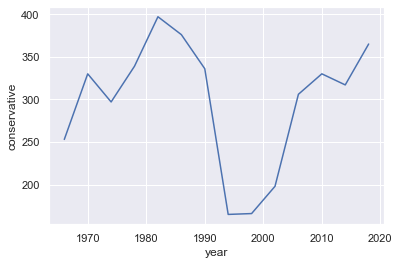

In [11]:
sns.set(style="darkgrid")  # "darkgrid"(default)/"whitegrid"/"dark"/"white"/"ticks"

# Plot the response with standard error
sns.lineplot(data=df, x="year", y="conservative")

## Seaborn: Scatter plot

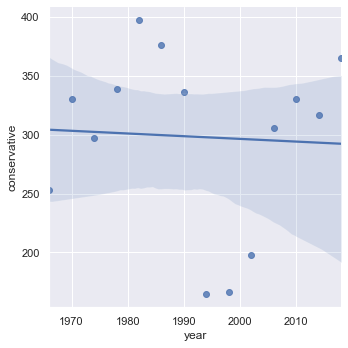

In [12]:
# Recommended way
sns.lmplot(x='year', y='conservative', data=df)
 
# Alternative way
# sns.lmplot(x=df.year, y=df.conservative)

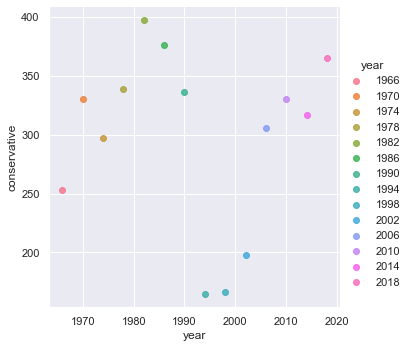

In [13]:
# Scatterplot arguments
fig=sns.lmplot(x='year', y='conservative', data=df,
           fit_reg=False, # No regression line
           hue='year')   # Color by year

Text(0, 0.5, 'Seats')

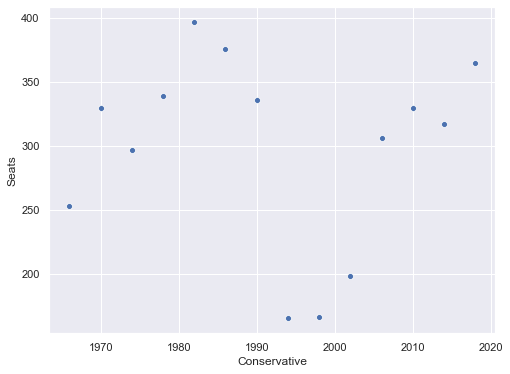

In [14]:
sns.set()
plt.figure(figsize=(8,6))
fig=sns.scatterplot(x='year',y=df["conservative"],data=df)
plt.xlabel('Conservative')
plt.ylabel('Seats')

## Seaborn: Bar Plot

### A) Single column

#### Seaborn: barplot

Text(0, 0.5, 'Seats')

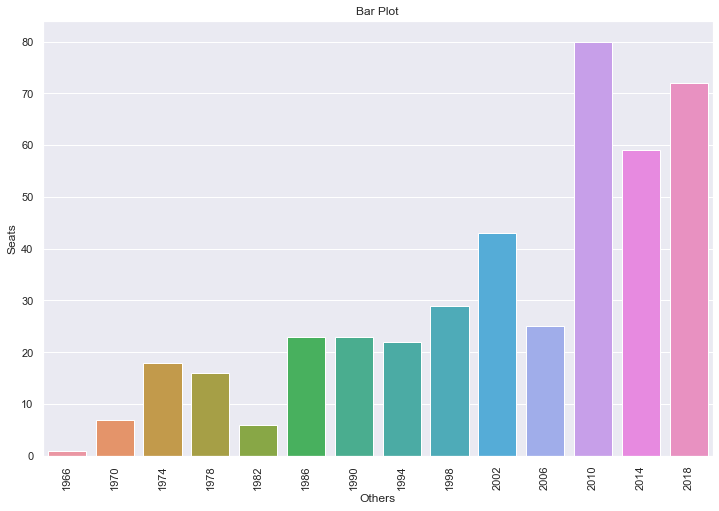

In [9]:
sns.set()   #Alias for set_theme(), which is the preferred interface.
plt.figure(figsize=(12,8))
sns.barplot(x='year',y=df["others"],data=df)
plt.xticks(rotation=90)
plt.title('Bar Plot')
plt.xlabel('Others')
plt.ylabel('Seats')

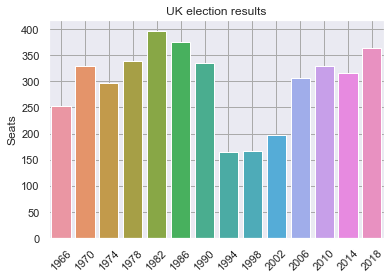

In [14]:
# This is where the actual plot gets made
ax = sns.barplot(data=df, x="year", y="conservative")

# Customise some display properties
ax.set_title('UK election results')
ax.grid(color='#AAAAAA')
ax.set_ylabel('Seats')
ax.set_xlabel(None)
ax.set_xticklabels(df["year"].unique().astype(str), rotation=45);

#### Seaborn: Histogram

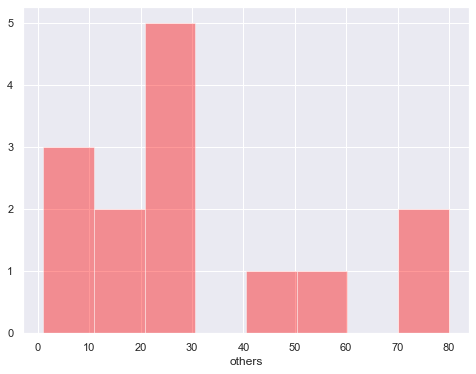

In [17]:
#Histogram
plt.figure(figsize=(8,6))
sns.distplot(df['others'], kde=False, color='red', bins=8)

In [19]:
print(df)

    year  conservative  labour  liberal  others
0   1966           253     364       12       1
1   1970           330     287        6       7
2   1974           297     301       14      18
3   1978           339     269       11      16
4   1982           397     209       23       6
5   1986           376     229       22      23
6   1990           336     271       20      23
7   1994           165     418       46      22
8   1998           166     412       52      29
9   2002           198     356       62      43
10  2006           306     258       57      25
11  2010           330     232        8      80
12  2014           317     262       12      59
13  2018           365     202       11      72


### A) Multiple columns

In [19]:
# Melt DataFrame
melted_df = pd.melt(df,
                    id_vars=["year"], # Variables to keep
                    var_name="party") # Name of melted variable
print(melted_df)

    year         party  value
0   1966  conservative    253
1   1970  conservative    330
2   1974  conservative    297
3   1978  conservative    339
4   1982  conservative    397
5   1986  conservative    376
6   1990  conservative    336
7   1994  conservative    165
8   1998  conservative    166
9   2002  conservative    198
10  2006  conservative    306
11  2010  conservative    330
12  2014  conservative    317
13  2018  conservative    365
14  1966        labour    364
15  1970        labour    287
16  1974        labour    301
17  1978        labour    269
18  1982        labour    209
19  1986        labour    229
20  1990        labour    271
21  1994        labour    418
22  1998        labour    412
23  2002        labour    356
24  2006        labour    258
25  2010        labour    232
26  2014        labour    262
27  2018        labour    202
28  1966       liberal     12
29  1970       liberal      6
30  1974       liberal     14
31  1978       liberal     11
32  1982  

### Seaborn: Line Plot

Text(0.5, 0, 'Year')

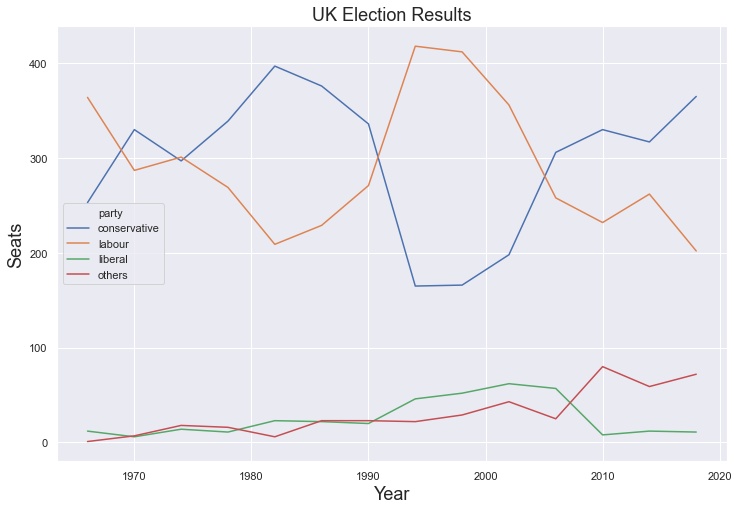

In [20]:
sns.set()
plt.figure(figsize=(12,8))
ax = sns.lineplot(
        data=melted_df,
        x="year",
        y="value",
        hue="party",
        )
ax.set_title('UK Election Results',fontsize=18)
ax.grid(color='#FFFFFF')
ax.set_ylabel('Seats',fontsize=18)
ax.set_xlabel('Year',fontsize=18)

### Seaborn: Scatter Plot

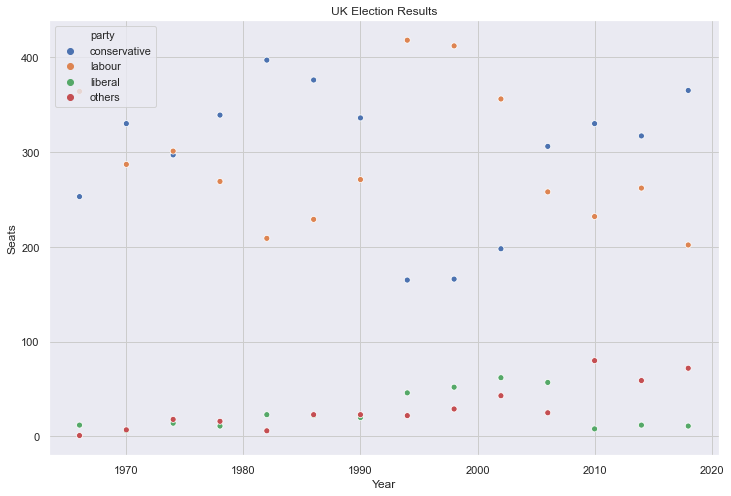

In [23]:
sns.set()
plt.figure(figsize=(12,8))
ax = sns.scatterplot(
        data=melted_df,
        x="year",
        y="value",
        hue="party",
        )
ax.set_title('UK Election Results')
ax.grid(color='#cccccc')
ax.set_ylabel('Seats')
ax.set_xlabel('Year')
ax.legend(loc='upper left')
#ax.set_xticklabels(labels=df['year'], rotation=45, ha='right');

### Seaborn: Bar Plot (a)

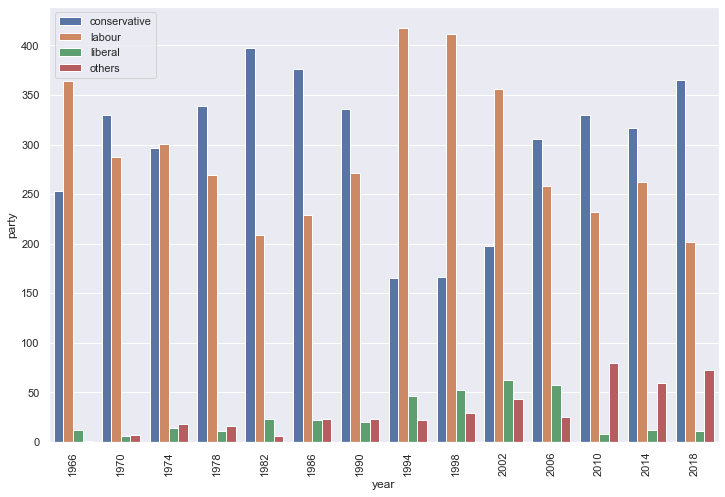

In [24]:
sns.set()
plt.figure(figsize=(12,8))
sns.barplot(x='year',y='value',hue='party',data=melted_df)
plt.xticks(rotation=90)
plt.xlabel('year')
plt.ylabel('party')
plt.legend(loc='upper left')

### Seaborn: Bar Plot (b)

Text(0.5, 0, '')

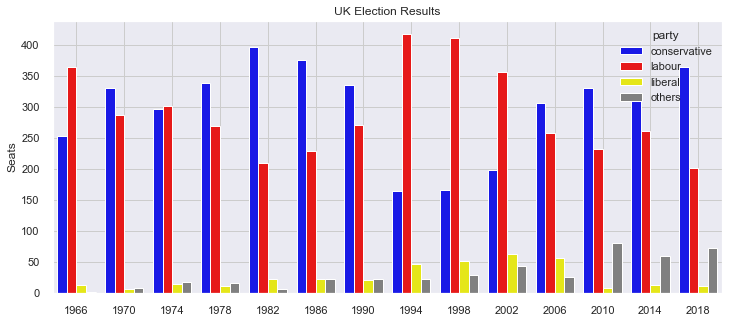

In [41]:
sns.set()
plt.figure(figsize=(12,5))
ax = sns.barplot(
        data=melted_df,
        x="year",
        y="value",
        hue="party",
        palette=['blue', 'red', 'yellow', 'grey'],
        saturation=0.8
    )
ax.set_title('UK Election Results')
ax.grid(color='#cccccc')
ax.set_ylabel('Seats')
ax.set_xlabel(None)
#ax.set_xticklabels(df["year"].unique().astype(str), rotation='vertical')

### Seaborn: Swarmplot
### Swarmplot gives a better picture in terms of the description of the relationship amongst categorical data variables.

Text(0.5, 0, 'Year')

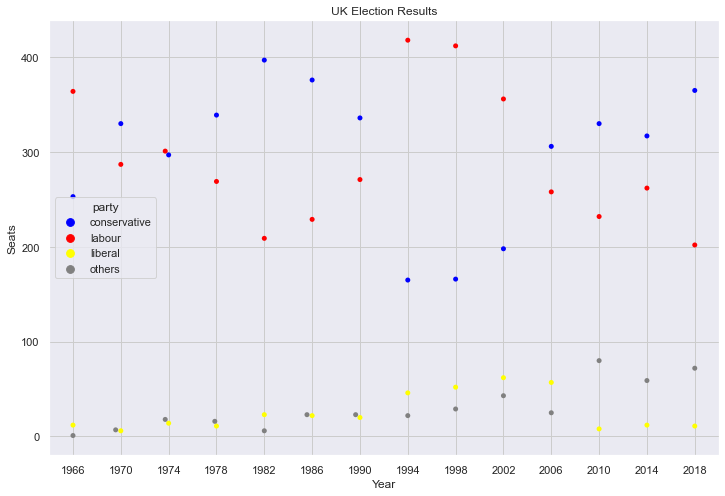

In [26]:
# Swarmplot with melted_df
sns.set()
plt.figure(figsize=(12,8))
ax = sns.swarmplot(
        data=melted_df,
        x="year",
        y="value",
        hue="party",
        palette=['blue', 'red', 'yellow', 'grey']
        )
ax.set_title('UK Election Results')
ax.grid(color='#cccccc')
ax.set_ylabel('Seats')
ax.set_xlabel('Year')

### Seaborn: Box plot

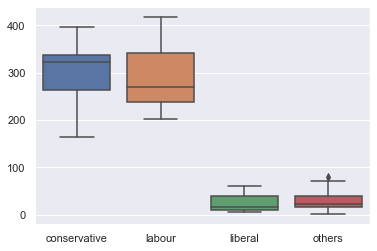

In [21]:
# Pre-format DataFrame
stats_df = df.drop(['year'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

In [22]:
print(df)

    year  conservative  labour  liberal  others
0   1966           253     364       12       1
1   1970           330     287        6       7
2   1974           297     301       14      18
3   1978           339     269       11      16
4   1982           397     209       23       6
5   1986           376     229       22      23
6   1990           336     271       20      23
7   1994           165     418       46      22
8   1998           166     412       52      29
9   2002           198     356       62      43
10  2006           306     258       57      25
11  2010           330     232        8      80
12  2014           317     262       12      59
13  2018           365     202       11      72


### Seaborn: Heatmap
#### Heatmaps help you visualize matrix-like data.

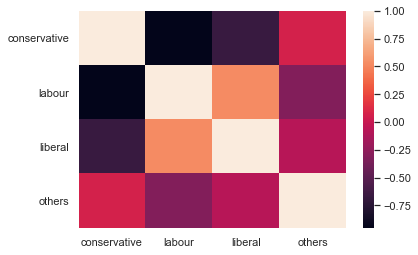

In [23]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

### Seaborn: Histogram
#### Histograms allow you to plot the distributions of numeric variables.

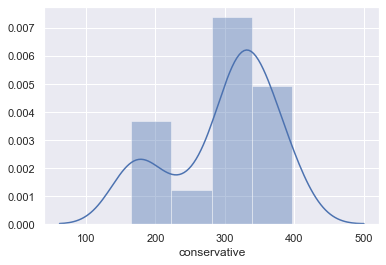

In [24]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.conservative)

### Seaborn: Density Plot
#### Density plots display the distribution between two variables.
#### Tip: Consider overlaying this with a scatter plot.

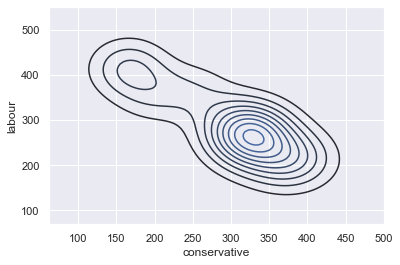

In [25]:
#Density Plot
sns.kdeplot(df.conservative, df.labour)

### Seaborn: Violin Plot
#### Violin Plot is used to represent the underlying data distribution of a data variable across its data values.

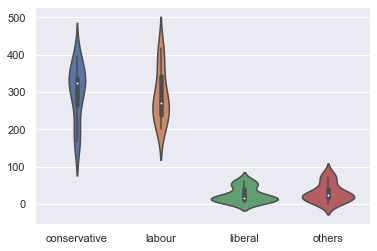

In [26]:
# Pre-format DataFrame
stats_df = df.drop(['year'], axis=1)
 
# violin plot using stats_df
sns.violinplot(data=stats_df)

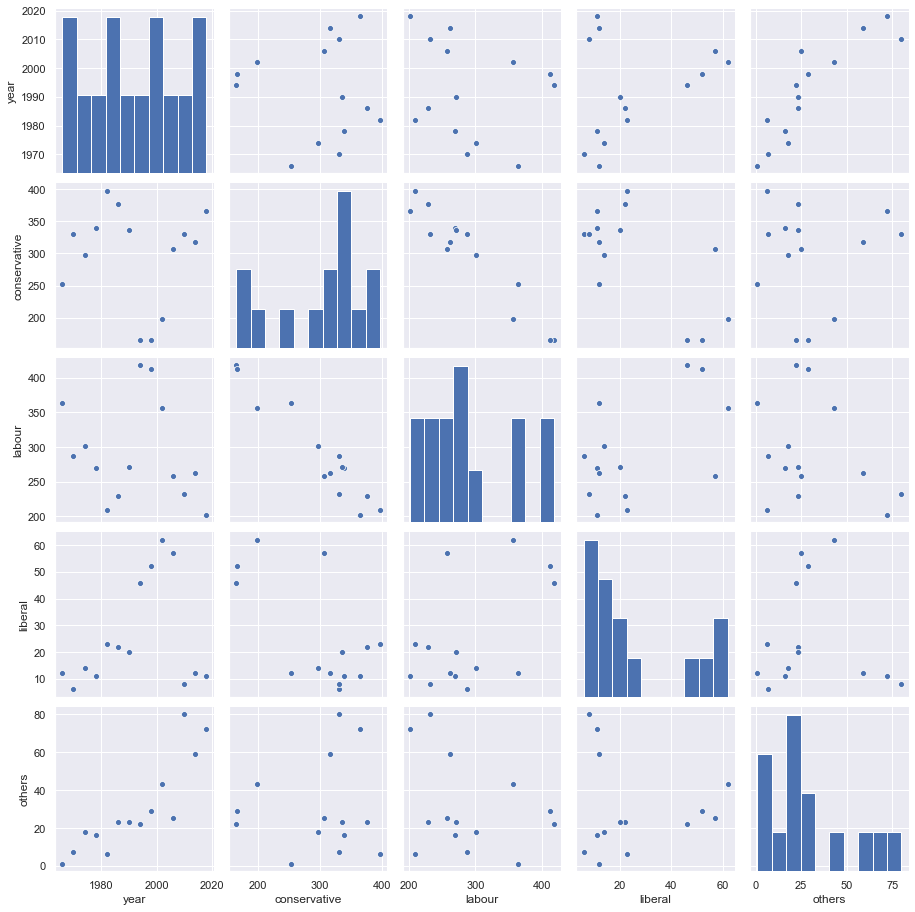

In [28]:
#It takes all the numerical attributes of the data and plot pairwise scatter plot for two different variables and 
# histograms from the same variables.
sns.pairplot(df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000262CEF1FDA0>],
      dtype=object)

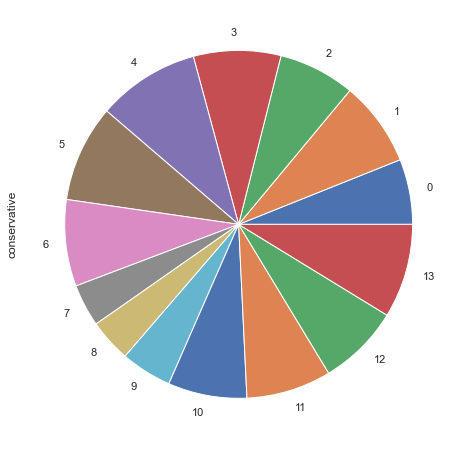

In [31]:
# make the pieplot
df['conservative'].plot(kind='pie', subplots=True, figsize=(8, 8))